# Text Preprocessing

## 1. Tokenization

#### Installing NLTK (https://www.nltk.org/)

Tokenization is the process of splitting text into smaller units, such as words or sentences, which are called tokens. It’s a key step in text preprocessing for natural language processing tasks.

To get started, you need to install the NLTK library, which provides various tools for tokenization and other text analysis tasks. You can install it by following the instructions on the official website: https://www.nltk.org/.

In [ ]:
# Downloading necessary NLTK libraries
import nltk
nltk.download('punkt')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### 1.1 Sentence Tokenize

In [ ]:
para = "Hello everyone. It's good to see you. Let's start our Unstructured Data Analysis class!"

In [ ]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(para)) # Tokenizing the given text into sentences, primarily using . ! ? as delimiters. (period, exclamation mark, question mark)

['Hello everyone.', "It's good to see you.", "Let's start our Unstructured Data Analysis class!"]


In [ ]:
paragraph_french = """Je t'ai demandé si tu m'aimais bien, Tu m'a répondu non.
Je t'ai demandé si j'étais jolie, Tu m'a répondu non.
Je t'ai demandé si j'étai dans ton coeur, Tu m'a répondu non."""

import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/french.pickle')
print(tokenizer.tokenize(paragraph_french))

["Je t'ai demandé si tu m'aimais bien, Tu m'a répondu non.", "Je t'ai demandé si j'étais jolie, Tu m'a répondu non.", "Je t'ai demandé si j'étai dans ton coeur, Tu m'a répondu non."]


In [ ]:
para_kor = "안녕하세요, 여러분. 만나서 반갑습니다. 이제 비정형데이터분석 수업을 시작해봅시다!"

In [ ]:
print(sent_tokenize(para_kor)) # The sentence tokenizer works well for Korean text as well.

['안녕하세요, 여러분.', '만나서 반갑습니다.', '이제 비정형데이터분석 수업을 시작해봅시다!']


### 1.2 Word Tokenize

The code imports the word_tokenize function from the NLTK library and then uses it to break down the given text (stored in the para variable) into individual words. The word_tokenize(para) function tokenizes the input text into word-level tokens, and the print function displays the tokenized output.

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(para)) # Tokenizing the given text into words.

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'Unstructured', 'Data', 'Analysis', 'class', '!']


In [ ]:
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize(para))

['Hello', 'everyone', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Let', "'", 's', 'start', 'our', 'Unstructured', 'Data', 'Analysis', 'class', '!']


In [ ]:
print(word_tokenize(para_kor))

['안녕하세요', ',', '여러분', '.', '만나서', '반갑습니다', '.', '이제', '비정형데이터분석', '수업을', '시작해봅시다', '!']


word_tokenize splits text into words while handling punctuation and contractions more naturally (e.g., don't becomes do and n't).

In contrast, WordPunctTokenizer splits text into words and separates every punctuation mark. For example, don't would be split into don and 't. It's more detailed in separating punctuation.

Depending on the characteristics of the text being analyzed, you can choose one of these tokenizers. word_tokenize is better for natural text, while WordPunctTokenizer is useful when you need to separate punctuation more explicitly.

### 1.3 Tokenization Using Regular Expressions

Tokenization using regular expressions involves splitting text based on specific patterns defined by regular expressions. This method allows for more control over how text is divided, such as splitting by spaces, punctuation, or other custom patterns.

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+") # # Tokenizer using a regular expression
# Tokenizes into words \w: Represents a word character (letter or digit)
# It finds sequences of letters, digits, or ' that repeat
print(tokenizer.tokenize("Sorry, I can't go there."))
# Treats "can't" as a single word


#\w: Matches any word character, which includes letters and digits (equivalent to [a-zA-Z0-9_]).
# ': Allows the tokenizer to include apostrophes (useful for handling contractions like "can't").
#  +: Ensures that the tokenizer matches sequences of word characters and apostrophes that repeat, treating them as a single token.

['Sorry', 'I', "can't", 'go', 'there']


In [ ]:
tokenizer = RegexpTokenizer("[\w]+")
print(tokenizer.tokenize("Sorry, I can't go there."))

#the regular expression [\w]+ is used. This pattern matches only word characters (letters or digits) without allowing apostrophes. As a result, can't will be split into two tokens: can and t.

['Sorry', 'I', 'can', 't', 'go', 'there']


In the first tokenizer, the regular expression [\w']+ is used. This pattern matches sequences of word characters (letters or digits) and allows apostrophes ('). This means words like can't will be treated as a single token.

In the second tokenizer, the regular expression [\w]+ is used. This pattern matches only word characters (letters or digits) without allowing apostrophes. As a result, can't will be split into two tokens: can and t.

In [ ]:
text1 = "Sorry, I can't go there."
tokenizer = RegexpTokenizer("[\w']{3,}")           #the token must be atleast 3 characters long
print(tokenizer.tokenize(text1.lower()))

['sorry', "can't", 'there']


In this case, the regular expression [\w']{3,} is used. This pattern matches sequences of word characters (letters or digits) and apostrophes, but only if they are three or more characters long. The {3,} specifies that the token must be at least 3 characters long. This means shorter words like I will be excluded, while words like sorry and can't will be included as tokens.

Additionally, the text1.lower() converts the text to lowercase before tokenization

### 1.4 Removing Noise and Stopwords

Removing noise and stopwords is done to clean the text and focus on meaningful content. Noise includes irrelevant characters, symbols, or data that don't contribute to the analysis. Stopwords are common words like 'the,' 'is,' or 'and,' which don't carry much meaning by themselves. Removing them helps improve the efficiency and accuracy of text analysis.

In [ ]:
from nltk.corpus import stopwords  # Common words that are not typically analyzed
english_stops = set(stopwords.words('english'))  # Converting to a set to avoid duplicates

text1 = "Sorry, I couldn't go to movie yesterday."

tokenizer = RegexpTokenizer("[\w']+")
tokens = tokenizer.tokenize(text1.lower())  # Tokenizing with word_tokenize

result = [word for word in tokens if word not in english_stops]  # Creating a list of words excluding stopwords
print(result)

['sorry', 'go', 'movie', 'yesterday']


In [ ]:
print(english_stops)  # Display the English stopwords provided by NLTK

{'ours', 'each', 'here', 'we', 'few', 'very', 'yours', 'doing', 'all', 'who', 'they', 'the', 'under', 'for', 'just', 'myself', 'same', 'is', 'itself', 'hers', 'no', 'hadn', 'theirs', 'below', 'so', 'mustn', 'against', "it's", 'whom', "needn't", "shan't", 'over', "mightn't", "didn't", 'than', 'will', 'when', 'shouldn', 'after', 'aren', "aren't", 'you', 'he', 'needn', 'me', 'been', 'nor', "you'd", 'on', 'themselves', "you're", 'these', 'but', "you've", "shouldn't", 'of', "haven't", 're', "you'll", 'my', 'those', 'into', 'not', "wouldn't", 'at', 'both', "isn't", 'above', 'do', 'only', 'other', 'such', 'and', 'our', 'through', 'more', 'she', 'while', 'again', 'wasn', 'some', 'can', 'am', "couldn't", 'your', 'this', 'isn', "weren't", 'does', 'during', 'had', 'an', 'because', 'if', 'd', 'didn', 'its', 'that', 'their', 'by', 'yourselves', 'them', 'now', 've', 'shan', 'down', 'too', 'where', 'off', 'has', 'be', 'it', 'being', 'as', 'with', 'having', 'about', 'before', 'won', 'are', 'were', "do

In [ ]:
# Creating and using custom stopwords
# Useful for processing Korean text as well
my_stopword = ['i', 'go', 'to']  # Defining custom stopwords in a list
result = [word for word in tokens if word not in my_stopword]
print(result)

['sorry', "couldn't", 'movie', 'yesterday']


# 2. Normalization
## 2.1 Stemming

Normalization involves converting text into a consistent format to improve analysis.

Stemming reduces words to their base or root form by cutting off prefixes or suffixes. For example, 'running' becomes 'run.' It’s a quick method but can sometimes produce non-standard words.

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

cook cookeri cookbook


In [ ]:
from nltk.tokenize import word_tokenize

para = "Hello everyone. It's good to see you. Let's start our text mining class!"
tokens = word_tokenize(para)  # Execute tokenization
print(tokens)
result = [stemmer.stem(token) for token in tokens]  # Perform stemming on all tokens
print(result)

['Hello', 'everyone', '.', 'It', "'s", 'good', 'to', 'see', 'you', '.', 'Let', "'s", 'start', 'our', 'text', 'mining', 'class', '!']
['hello', 'everyon', '.', 'it', "'s", 'good', 'to', 'see', 'you', '.', 'let', "'s", 'start', 'our', 'text', 'mine', 'class', '!']


In [ ]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
print(stemmer.stem('cooking'), stemmer.stem('cookery'), stemmer.stem('cookbooks'))

#The Lancaster Stemmer applies a different set of rules compared to the Porter Stemmer

cook cookery cookbook


Porter Stemmer is usually the better choice. The Lancaster Stemmer can be more effective in some scenarios, but it may also result in more aggressive reductions, meaning it can reduce words more drastically.

## 2.2 Lemmatization

Lemmatization also reduces words to their base form but considers the context and part of speech, resulting in actual words. For example, 'running' becomes 'run,' but 'better' becomes 'good.' It’s more accurate than stemming.

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize('cooking'))  # Lemmatize without specifying part of speech
print(lemmatizer.lemmatize('cooking', pos='v'))  # Lemmatize with part of speech as verb
print(lemmatizer.lemmatize('cookery'))  # Lemmatize "cookery"
print(lemmatizer.lemmatize('cookbooks'))  # Lemmatize "cookbooks"

cooking
cook
cookery
cookbook


In [ ]:
# Comparison of lemmatizing and stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print('stemming result:', stemmer.stem('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes'))
print('lemmatizing result:', lemmatizer.lemmatize('believes', pos='v'))         #pos ='v' specifying it is a verb

stemming result: believ
lemmatizing result: belief
lemmatizing result: believe


# 3. Part-of-Speech Tagging

## 3.1 Understanding Parts of Speech

Parts of Speech (POS) tagging involves identifying and labeling each word in a sentence with its grammatical category, such as noun, verb, adjective, etc. Understanding the parts of speech helps in analyzing the structure of the text and can improve tasks like parsing, sentiment analysis, and information extraction.


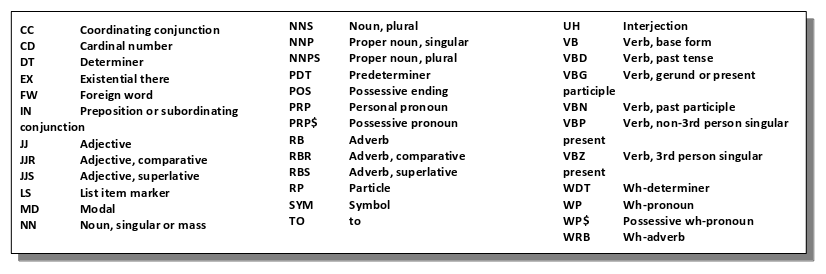

## 3.2 Part-of-Speech Tagging using NLTK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

tokens = word_tokenize("Hello everyone. It's good to see you. Let's start our text mining class!")
print(nltk.pos_tag(tokens))

[('Hello', 'NNP'), ('everyone', 'NN'), ('.', '.'), ('It', 'PRP'), ("'s", 'VBZ'), ('good', 'JJ'), ('to', 'TO'), ('see', 'VB'), ('you', 'PRP'), ('.', '.'), ('Let', 'VB'), ("'s", 'POS'), ('start', 'VB'), ('our', 'PRP$'), ('text', 'NN'), ('mining', 'NN'), ('class', 'NN'), ('!', '.')]


In [ ]:
nltk.help.upenn_tagset('CC')

# Coordinating conjunctions are used to connect words, phrases, or clauses that are similar or equal in structure.
#Examples of coordinating conjunctions include: and, but, or, nor, for, so, yet.

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


In [ ]:
my_tag_set = ['NN', 'VB', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(tokens) if tag in my_tag_set]
print(my_words)

['everyone', 'good', 'see', 'Let', 'start', 'text', 'mining', 'class']


In [ ]:
words_with_tag = ['/'.join(item) for item in nltk.pos_tag(tokens)]
print(words_with_tag)

['Hello/NNP', 'everyone/NN', './.', 'It/PRP', "'s/VBZ", 'good/JJ', 'to/TO', 'see/VB', 'you/PRP', './.', 'Let/VB', "'s/POS", 'start/VB', 'our/PRP$', 'text/NN', 'mining/NN', 'class/NN', '!/.']


# 4. Named Entity Recognition

## 4.1 Understanding Named Entity Recognition

Named Entity Recognition (NER) is the process of identifying and classifying entities in text, such as names of people, organizations, locations, dates, and more. NER helps in extracting important information from text, enabling tasks like information retrieval, question answering, and summarization.

## 4.2 Named Entity Recognition using NTLK

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk

#word_tokenize: Tokenizes the input sentence into individual words.
#pos_tag: Assigns part-of-speech tags to each token.
#ne_chunk: Identifies and classifies named entities in the tagged tokens.


sentence = "James is working at Disney in London"
# Tokenization followed by POS tagging
tokenized_sentence = pos_tag(word_tokenize(sentence))
print(tokenized_sentence)

Sam sung -> Sa

[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [ ]:
# Named Entity Recogntion
ner_sentence = ne_chunk(tokenized_sentence)
print(ner_sentence)

(S
  (PERSON James/NNP)
  is/VBZ
  working/VBG
  at/IN
  (ORGANIZATION Disney/NNP)
  in/IN
  (GPE London/NNP))
